## Preparation work: downloading necessary files and importing necessary libraries

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
!pip install emoji
import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('omw-1.4')   # I added this command to run lemmatizer.lemmatize() without errors
nltk.download('averaged_perceptron_tagger')   # I added this command to run lemmatizer.lemmatize() without errors
from string import punctuation
import numpy as np
import pandas as pd
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=edd81bcb6bfc4b9130a1734e7cd3afadbe44f8fe70fc67f05d748e775ffaad02
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## Setting sets and functions for text pre-processing and lemmatization

In [2]:
stop_words = set(stopwords.words('english'))

In [3]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

In [6]:
def text_preprocessing_and_lemmatization(text):
    text = str(text).lower()

    lemmatized_words = []
    tokens = nltk.word_tokenize(text)
    processed_tokens = [remove_emojis(token) for token in tokens if token.isalpha() and token not in stop_words and token not in list(punctuation)]
    for word, tag in nltk.pos_tag(processed_tokens):
        pos = get_wordnet_pos(tag)
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemmatized_words.append(lemma)
    
    return ' '.join(lemmatized_words)

## Loading and visualizing DisneyPlus reviews

In [8]:
disneyplus = pd.read_csv('DisneyPlus_Google_Play.csv')

In [9]:
disneyplus.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN


In [10]:
disneyplus.shape

(209186, 11)

In [11]:
disneyplus.score.describe()

count    209186.000000
mean          3.399530
std           1.750098
min           1.000000
25%           1.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: score, dtype: float64

## Processing reviews

In [12]:
reviews = disneyplus['content']
processed_reviews = reviews.apply(text_preprocessing_and_lemmatization)   # function to pre-process and lemmatize the reviews

processed_reviews

0                                        absolutely awesome
1         wonder software disney plus issue always come ...
2                                        give month premium
3                                                     great
4                                               mandalorian
                                ...                        
209181                              love disney awesome app
209182    crash switch kid profile authorisation require...
209183            love disney happy beautiful streaming app
209184                                      best app stream
209185    great app pretty polish even officially releas...
Name: content, Length: 209186, dtype: object

In [13]:
disneyplus['processed_reviews'] = processed_reviews

In [14]:
tokenized_reviews = [nltk.word_tokenize(review) for review in processed_reviews.to_list()]
disneyplus['tokenized_reviews'] = pd.Series(tokenized_reviews)

In [15]:
disneyplus

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,processed_reviews,tokenized_reviews
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN,absolutely awesome,"[absolutely, awesome]"
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN,wonder software disney plus issue always come ...,"[wonder, software, disney, plus, issue, always..."
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN,give month premium,"[give, month, premium]"
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN,great,[great]
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN,mandalorian,[mandalorian]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209181,209181,99bd5530-071c-46ae-8d65-f396a788805e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney! Awesome app!,5,6,1.0.0,2019-09-12 06:17:19,NaN,NaN,love disney awesome app,"[love, disney, awesome, app]"
209182,209182,866c928f-7d71-4b48-bb57-08dd93d3364e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Crashes once when switching over to kids profi...,1,5,1.0.0,2019-09-12 06:08:19,Hello Rocco. Thanks for the feedback. Can you ...,2019-09-21 17:32:41,crash switch kid profile authorisation require...,"[crash, switch, kid, profile, authorisation, r..."
209183,209183,1c1eaa4c-c4c3-4742-8c77-e8af41458549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney so I'm very happy with this (ver...,5,3,1.0.0,2019-09-12 05:31:04,NaN,NaN,love disney happy beautiful streaming app,"[love, disney, happy, beautiful, streaming, app]"
209184,209184,c4d3a462-ac13-4fef-b21c-12e86223e1e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's the best app streaming,5,1,1.0.0,2019-09-12 04:52:26,NaN,NaN,best app stream,"[best, app, stream]"


## Exploration of lemmatized words

In [16]:
lemmatized_words = []

for r in processed_reviews:
  lemmatized_words += r.split()

In [17]:
lemmatized_words

['absolutely',
 'awesome',
 'wonder',
 'software',
 'disney',
 'plus',
 'issue',
 'always',
 'come',
 'playing',
 'dolby',
 'atmos',
 'movie',
 'sound',
 'system',
 'come',
 'thru',
 'sound',
 'bar',
 'awhile',
 'lag',
 'abit',
 'watch',
 'netflix',
 'platform',
 'issue',
 'sound',
 'kindly',
 'ple',
 'fixed',
 'issue',
 'pay',
 'monthly',
 'give',
 'month',
 'premium',
 'great',
 'mandalorian',
 'like',
 'show',
 'awesome',
 'app',
 'love',
 'easy',
 'use',
 'awesome',
 'movie',
 'tv',
 'show',
 'horrible',
 'app',
 'constantly',
 'buffer',
 'every',
 'netflix',
 'hulu',
 'run',
 'fine',
 'also',
 'minimize',
 'screen',
 'continue',
 'watch',
 'new',
 'movie',
 'happy',
 'nice',
 'app',
 'honestly',
 'get',
 'everyone',
 'hate',
 'issue',
 'long',
 'take',
 'rewind',
 'app',
 'play',
 'download',
 'content',
 'wo',
 'open',
 'say',
 'update',
 'play',
 'fine',
 'tv',
 'always',
 'buffer',
 'say',
 'offline',
 'terrible',
 'app',
 'always',
 'say',
 'signal',
 'offline',
 'connection',

In [18]:
dict_words = {}

for word in lemmatized_words:
  if word in dict_words:
    dict_words[word] += 1
  else:
    dict_words[word] = 1

In [19]:
sorted_words_by_frequency = sorted(dict_words.items(), key=lambda x:x[1], reverse = True)
converted_dict = dict(sorted_words_by_frequency)

In [20]:
converted_dict

{'app': 75013,
 'love': 38999,
 'watch': 38168,
 'movie': 36683,
 'disney': 35157,
 'work': 32271,
 'great': 25293,
 'good': 24707,
 'show': 24199,
 'get': 23344,
 'like': 16551,
 'load': 14556,
 'time': 14190,
 'phone': 13891,
 'use': 13621,
 'ca': 13399,
 'tv': 12960,
 'even': 12944,
 'download': 12182,
 'content': 12148,
 'try': 11612,
 'go': 10923,
 'play': 10756,
 'fix': 10731,
 'would': 10534,
 'service': 10042,
 'star': 9855,
 'keep': 9785,
 'stream': 9287,
 'issue': 9117,
 'pay': 9001,
 'need': 8826,
 'say': 8678,
 'one': 8619,
 'really': 8603,
 'error': 8457,
 'wo': 8332,
 'screen': 8021,
 'best': 7911,
 'want': 7697,
 'plus': 7587,
 'still': 7575,
 'new': 7566,
 'update': 7423,
 'netflix': 7256,
 'make': 7133,
 'amaze': 7101,
 'every': 7082,
 'well': 6865,
 'problem': 6836,
 'thing': 6739,
 'episode': 6662,
 'subscription': 6498,
 'kid': 6457,
 'give': 6414,
 'open': 6394,
 'awesome': 6382,
 'please': 6322,
 'see': 6249,
 'much': 6116,
 'anything': 5994,
 'back': 5721,
 'canc

## Exploration of bigrams

In [21]:
bigrams = [bigram for review in tokenized_reviews for bigram in nltk.bigrams(review)]

In [22]:
bigrams_counter = Counter(bigrams)

In [23]:
bigrams_counter

Counter({('absolutely', 'awesome'): 33,
         ('wonder', 'software'): 1,
         ('software', 'disney'): 6,
         ('disney', 'plus'): 6213,
         ('plus', 'issue'): 22,
         ('issue', 'always'): 28,
         ('always', 'come'): 27,
         ('come', 'playing'): 1,
         ('playing', 'dolby'): 2,
         ('dolby', 'atmos'): 126,
         ('atmos', 'movie'): 3,
         ('movie', 'sound'): 36,
         ('sound', 'system'): 14,
         ('system', 'come'): 1,
         ('come', 'thru'): 5,
         ('thru', 'sound'): 1,
         ('sound', 'bar'): 10,
         ('bar', 'awhile'): 1,
         ('awhile', 'lag'): 2,
         ('lag', 'abit'): 2,
         ('abit', 'watch'): 2,
         ('watch', 'netflix'): 153,
         ('netflix', 'platform'): 6,
         ('platform', 'issue'): 8,
         ('issue', 'sound'): 19,
         ('sound', 'kindly'): 1,
         ('kindly', 'ple'): 1,
         ('ple', 'fixed'): 1,
         ('fixed', 'issue'): 21,
         ('issue', 'pay'): 39,
         

In [24]:
sorted_bigrams_by_frequency = sorted(bigrams_counter.items(), key=lambda x:x[1], reverse = True)
converted_dict_bigrams = dict(sorted_bigrams_by_frequency)

In [25]:
converted_dict_bigrams

{('disney', 'plus'): 6213,
 ('love', 'app'): 5578,
 ('great', 'app'): 4519,
 ('app', 'work'): 4481,
 ('love', 'disney'): 4383,
 ('star', 'war'): 3522,
 ('disney', 'movie'): 3264,
 ('movie', 'show'): 3223,
 ('show', 'movie'): 3215,
 ('watch', 'movie'): 3059,
 ('error', 'code'): 2887,
 ('good', 'app'): 2824,
 ('work', 'fine'): 2683,
 ('please', 'fix'): 2501,
 ('watch', 'anything'): 2295,
 ('stream', 'service'): 2119,
 ('tv', 'show'): 2100,
 ('cancel', 'subscription'): 2086,
 ('ca', 'even'): 1988,
 ('ca', 'watch'): 1949,
 ('use', 'app'): 1800,
 ('continue', 'watch'): 1780,
 ('want', 'watch'): 1780,
 ('get', 'error'): 1752,
 ('app', 'ever'): 1709,
 ('best', 'app'): 1695,
 ('open', 'app'): 1661,
 ('really', 'good'): 1587,
 ('work', 'great'): 1584,
 ('try', 'watch'): 1582,
 ('every', 'time'): 1549,
 ('watch', 'disney'): 1527,
 ('load', 'screen'): 1498,
 ('app', 'wo'): 1444,
 ('able', 'watch'): 1404,
 ('smart', 'tv'): 1359,
 ('love', 'watch'): 1356,
 ('get', 'app'): 1344,
 ('give', 'star'): 1

## Exploration of trigrams

In [26]:
trigrams = [trigram for review in tokenized_reviews for trigram in nltk.trigrams(review)]

In [27]:
trigrams_counter = Counter(trigrams)

In [28]:
sorted_trigrams_by_frequency = sorted(trigrams_counter.items(), key=lambda x:x[1], reverse = True)
converted_dict_trigrams = dict(sorted_trigrams_by_frequency)

In [29]:
converted_dict_trigrams

{('love', 'disney', 'plus'): 1131,
 ('movie', 'tv', 'show'): 983,
 ('best', 'app', 'ever'): 922,
 ('get', 'error', 'code'): 730,
 ('marvel', 'star', 'war'): 627,
 ('keep', 'get', 'error'): 614,
 ('ca', 'watch', 'anything'): 572,
 ('star', 'war', 'marvel'): 470,
 ('something', 'go', 'wrong'): 424,
 ('take', 'forever', 'load'): 422,
 ('love', 'disney', 'movie'): 421,
 ('watch', 'disney', 'movie'): 415,
 ('love', 'love', 'love'): 414,
 ('every', 'time', 'try'): 390,
 ('continue', 'watch', 'section'): 384,
 ('app', 'work', 'fine'): 378,
 ('ca', 'even', 'get'): 372,
 ('get', 'error', 'message'): 363,
 ('app', 'work', 'great'): 349,
 ('best', 'thing', 'ever'): 344,
 ('say', 'unable', 'connect'): 341,
 ('app', 'stop', 'work'): 326,
 ('try', 'watch', 'something'): 322,
 ('app', 'wo', 'load'): 313,
 ('disney', 'movie', 'show'): 309,
 ('ca', 'even', 'watch'): 300,
 ('give', 'error', 'code'): 298,
 ('really', 'good', 'app'): 297,
 ('disney', 'plus', 'app'): 293,
 ('would', 'give', 'star'): 292,
 

## Visualization of main trigrams

We find the top 10 trigrams

In [30]:
top_trigrams = []
counter = 0

for trigram in converted_dict_trigrams:
  top_trigrams.append(trigram)
  counter += 1

  if counter >= 10:   # change if you want a different number of top reviews
    break

top_trigrams

[('love', 'disney', 'plus'),
 ('movie', 'tv', 'show'),
 ('best', 'app', 'ever'),
 ('get', 'error', 'code'),
 ('marvel', 'star', 'war'),
 ('keep', 'get', 'error'),
 ('ca', 'watch', 'anything'),
 ('star', 'war', 'marvel'),
 ('something', 'go', 'wrong'),
 ('take', 'forever', 'load')]

We add a column with trigrams for each review to the df

In [31]:
trigrams_for_review = pd.Series([[trigram for trigram in nltk.trigrams(review)] for review in tokenized_reviews])

In [32]:
trigrams_for_review

0                                                        []
1         [(wonder, software, disney), (software, disney...
2                                  [(give, month, premium)]
3                                                        []
4                                                        []
                                ...                        
209181    [(love, disney, awesome), (disney, awesome, app)]
209182    [(crash, switch, kid), (switch, kid, profile),...
209183    [(love, disney, happy), (disney, happy, beauti...
209184                                [(best, app, stream)]
209185    [(great, app, pretty), (app, pretty, polish), ...
Length: 209186, dtype: object

In [33]:
disneyplus['trigrams'] = trigrams_for_review

In [34]:
disneyplus

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,processed_reviews,tokenized_reviews,trigrams
0,0,75affb77-43d6-4ada-9d8d-576d75a89295,William Graham,https://play-lh.googleusercontent.com/a/AGNmyx...,absolutely awesome 👌,5,0,2.18.1-rc1,2023-04-05 11:13:22,NaN,NaN,absolutely awesome,"[absolutely, awesome]",[]
1,1,de8a389b-d296-484b-8049-555b31436e70,Nelson Lam,https://play-lh.googleusercontent.com/a/AGNmyx...,I wonder the software of Disney plus have an i...,1,0,NaN,2023-04-05 11:10:55,NaN,NaN,wonder software disney plus issue always come ...,"[wonder, software, disney, plus, issue, always...","[(wonder, software, disney), (software, disney..."
2,2,f0b0ef9c-5db3-44d5-9b70-2984685a55a2,Denuwan Saranga,https://play-lh.googleusercontent.com/a-/ACB-R...,Can you give 1 month premium free❤️Please,5,0,NaN,2023-04-05 10:57:42,NaN,NaN,give month premium,"[give, month, premium]","[(give, month, premium)]"
3,3,f9b16c2c-6bf1-4de2-acf9-25db53feccf2,Gratien ABANJYE,https://play-lh.googleusercontent.com/a-/ACB-R...,Great,5,0,NaN,2023-04-05 10:40:22,NaN,NaN,great,[great],[]
4,4,9e483f7c-c572-4e46-a47a-f579a6d230ee,Jason Parker,https://play-lh.googleusercontent.com/a-/ACB-R...,mandalorian!,5,0,2.18.1-rc1,2023-04-05 10:22:27,NaN,NaN,mandalorian,[mandalorian],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209181,209181,99bd5530-071c-46ae-8d65-f396a788805e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney! Awesome app!,5,6,1.0.0,2019-09-12 06:17:19,NaN,NaN,love disney awesome app,"[love, disney, awesome, app]","[(love, disney, awesome), (disney, awesome, app)]"
209182,209182,866c928f-7d71-4b48-bb57-08dd93d3364e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Crashes once when switching over to kids profi...,1,5,1.0.0,2019-09-12 06:08:19,Hello Rocco. Thanks for the feedback. Can you ...,2019-09-21 17:32:41,crash switch kid profile authorisation require...,"[crash, switch, kid, profile, authorisation, r...","[(crash, switch, kid), (switch, kid, profile),..."
209183,209183,1c1eaa4c-c4c3-4742-8c77-e8af41458549,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love Disney so I'm very happy with this (ver...,5,3,1.0.0,2019-09-12 05:31:04,NaN,NaN,love disney happy beautiful streaming app,"[love, disney, happy, beautiful, streaming, app]","[(love, disney, happy), (disney, happy, beauti..."
209184,209184,c4d3a462-ac13-4fef-b21c-12e86223e1e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's the best app streaming,5,1,1.0.0,2019-09-12 04:52:26,NaN,NaN,best app stream,"[best, app, stream]","[(best, app, stream)]"


In [35]:
score_sum = np.zeros(10)   # change if you want a different number of top reviews

for j in range(len(top_trigrams)):
  for i in range(len(disneyplus.trigrams)):
    if top_trigrams[j] in disneyplus.trigrams[i]:
      score_sum[j] += disneyplus.score[i]

In [36]:
counter = []

for trigram in top_trigrams:
  counter.append(converted_dict_trigrams[trigram])

In [37]:
score_average = score_sum / np.array(counter)

In [38]:
score_average

array([4.52077807, 4.08748728, 4.9132321 , 1.36164384, 4.45295056,
       1.38599349, 1.44230769, 4.44680851, 1.47169811, 1.70379147])

In [39]:
trigrams_scores = pd.DataFrame({'top_trigrams': top_trigrams, 'avg_rating': score_average, 'counter': counter})

In [40]:
trigrams_scores

,top_trigrams,avg_rating,counter
0,"(love, disney, plus)",4.520778,1131
1,"(movie, tv, show)",4.087487,983
2,"(best, app, ever)",4.913232,922
3,"(get, error, code)",1.361644,730
4,"(marvel, star, war)",4.452951,627
5,"(keep, get, error)",1.385993,614
6,"(ca, watch, anything)",1.442308,572
7,"(star, war, marvel)",4.446809,470
8,"(something, go, wrong)",1.471698,424
9,"(take, forever, load)",1.703791,422


In [41]:
trigrams_scores.avg_rating = round(trigrams_scores.avg_rating, 2)

In [42]:
trigrams_scores

,top_trigrams,avg_rating,counter
0,"(love, disney, plus)",4.52,1131
1,"(movie, tv, show)",4.09,983
2,"(best, app, ever)",4.91,922
3,"(get, error, code)",1.36,730
4,"(marvel, star, war)",4.45,627
5,"(keep, get, error)",1.39,614
6,"(ca, watch, anything)",1.44,572
7,"(star, war, marvel)",4.45,470
8,"(something, go, wrong)",1.47,424
9,"(take, forever, load)",1.70,422


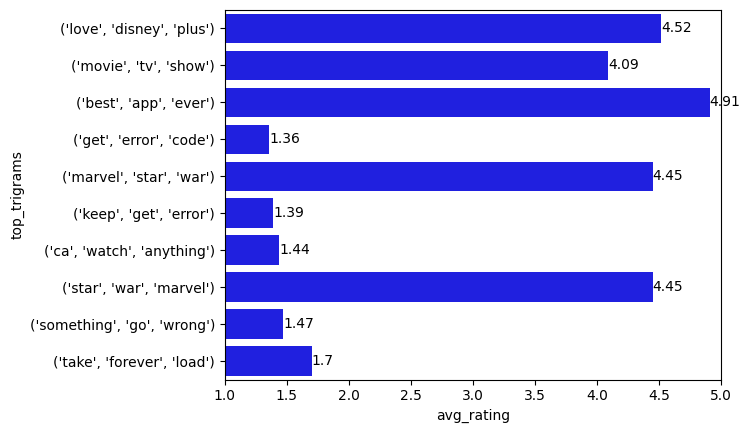

In [43]:
g = sns.barplot(data=trigrams_scores, y = 'top_trigrams', x = 'avg_rating', color = 'blue', orient = 'h')
g.axes.set_xlim(1, 5)
for i in g.containers:
    g.bar_label(i,)

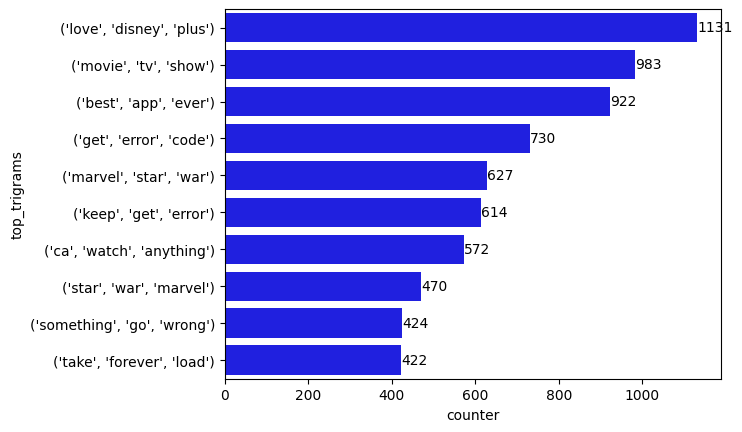

In [44]:
g = sns.barplot(data=trigrams_scores, y = 'top_trigrams', x = 'counter', color = 'blue', orient = 'h')
for i in g.containers:
    g.bar_label(i,)

In [45]:
trigrams_scores['top_trigrams'] = trigrams_scores['top_trigrams'].astype(str)

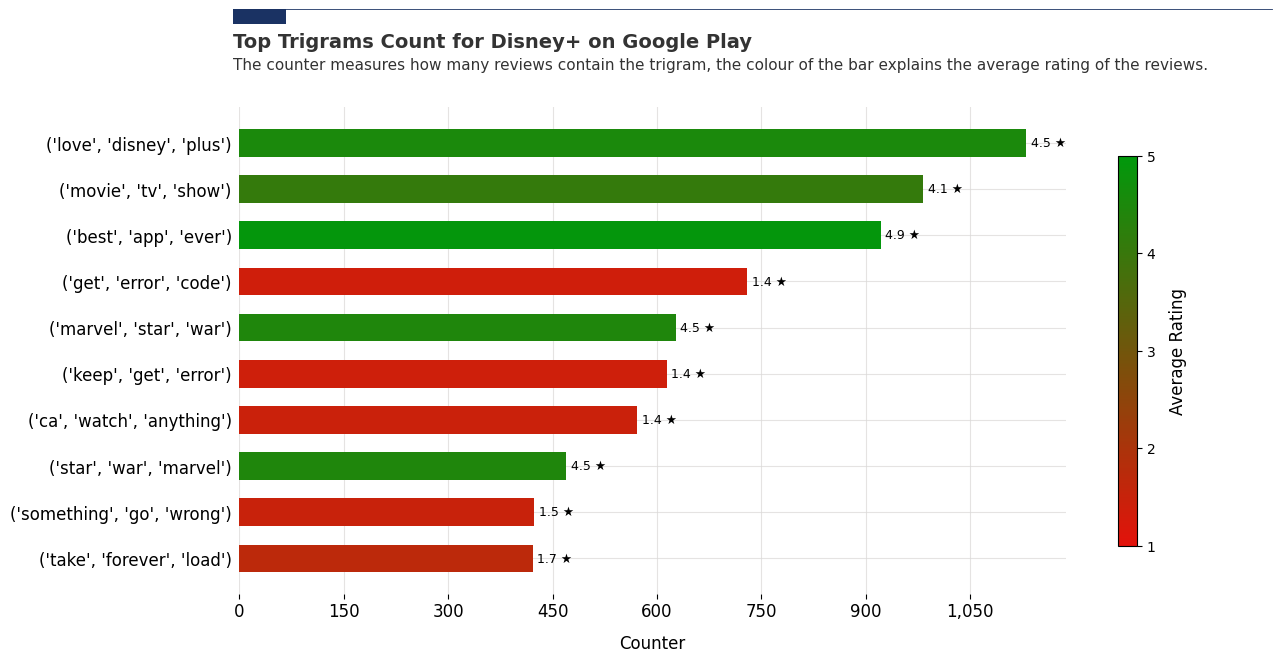

In [46]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi=100)

# Create a linear color map from red to green
cmap = mpl.colors.LinearSegmentedColormap.from_list('rating_map', ['#E3120B', '#00990C'], N=256)

# Normalize the ratings to the [0.0, 1.0] interval
norm = mpl.colors.Normalize(vmin=1, vmax=5)

# Compute the color for each bar based on its rating
colors = [cmap(norm(r)) for r in trigrams_scores['avg_rating']]

# Plot horizontal bars with the computed colors
bar1 = ax.barh(trigrams_scores['top_trigrams'], trigrams_scores['counter'], height=0.6, color=colors, alpha=1,zorder=3)

# Set the ticks and labels
ax.set_yticks(trigrams_scores['top_trigrams'])
ax.set_yticklabels(trigrams_scores['top_trigrams'], fontsize=10)
ax.set_xticks(range(0, 1000, 100))
ax.set_xticklabels(range(0, 1000, 100), fontsize=10)

# Invert the y-axis to show the bars in descending order
ax.invert_yaxis()

# Create the grid 
ax.grid(which='major', axis='x', color='#DAD8D7', alpha=0.7, zorder=1)
ax.grid(which='major', axis='y', color='#DAD8D7', alpha=0.7, zorder=1)

# Add labels to the bars
# Add labels to the bars
labels = [f'{e:.1f} \u2605' for e in trigrams_scores['avg_rating']]
ax.bar_label(bar1, labels=labels, padding=3, color='black', fontsize=9)


# Set x-axis formatting and tick parameters
ax.xaxis.set_label_position('bottom')
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = ['0', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000', '1100']
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#1A3263', transform=fig.transFigure, clip_on=False, linewidth = 0))
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#1A3263', linewidth=.6)

# Reformat y-axis
ax.yaxis.set_label_position('left')
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)
ax.spines[['top', 'left', 'bottom']].set_visible(False)
ax.spines['right'].set_linewidth(1.1)

# Add a color bar to the right of the plot
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, shrink=0.8, aspect = 20, ticks=np.arange(1, 6, 1))
cbar.set_label('Average Rating', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=10)

# Add title and subtitle
ax.text(x=0.12, y=0.93, s='Top Trigrams Count for Disney+ on Google Play', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.12, y=0.90, s='The counter measures how many reviews contain the trigram, the colour of the bar explains the average rating of the reviews.', transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

ax.set_xlabel('Counter', fontsize=12, labelpad=10)

# Remove the right spine
ax.spines['right'].set_visible(False)


plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

## Creation of Word2Vec using genism

In [47]:
import gensim
from gensim.models import Word2Vec 
model = Word2Vec(tokenized_reviews, window=5, min_count=5)

In [49]:
model.wv.most_similar(positive=['service', 'positive'], negative = ['issue'], topn=10)

[('loyal', 0.5770540237426758),
 ('extensive', 0.5708972811698914),
 ('organization', 0.5703560709953308),
 ('broad', 0.5583774447441101),
 ('phenomenal', 0.5558179616928101),
 ('diverse', 0.5543363094329834),
 ('among', 0.5520614385604858),
 ('exception', 0.5501309633255005),
 ('mature', 0.5417293310165405),
 ('immense', 0.5403943061828613)]